In [7]:

import numpy as np
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
from keras.models import Model
import keras
# define path to dataset
path = "/kaggle/input/sign-language-dataset/ImagePro"
path2 = "/kaggle/input/myimagepro/myImagePro"



## Preparations

In [ ]:
#pip install opencv-python

In [8]:
pip install cvzone

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [11]:
#https://drive.google.com/file/d/1e8bDeSfhrS1cRpEt8LO13GFrTlKEHrN7/view?usp=drivesdk
!gdown --id 1e8bDeSfhrS1cRpEt8LO13GFrTlKEHrN7

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1e8bDeSfhrS1cRpEt8LO13GFrTlKEHrN7
From (redirected): https://drive.google.com/uc?id=1e8bDeSfhrS1cRpEt8LO13GFrTlKEHrN7&confirm=t&uuid=6c26064d-7514-49f4-8522-4c71e94fd6d9
To: /kaggle/working/Copy of Dataset.zip
100%|██████████████████████████████████████| 59.2M/59.2M [00:00<00:00, 72.0MB/s]


In [12]:
#https://drive.google.com/file/d/1Jn4cZWXOwoVBXeCizxmI3H6xYhrQyIsP/view?usp=drivesdk
!gdown --id 1Jn4cZWXOwoVBXeCizxmI3H6xYhrQyIsP

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1Jn4cZWXOwoVBXeCizxmI3H6xYhrQyIsP
From (redirected): https://drive.google.com/uc?id=1Jn4cZWXOwoVBXeCizxmI3H6xYhrQyIsP&confirm=t&uuid=74dfae4a-d53d-4975-92ba-ce9104b4e5f6
To: /kaggle/working/ImagePro.zip
100%|███████████████████████████████████████| 48.9M/48.9M [00:00<00:00, 208MB/s]


Download the 1st person dataset

In [13]:
!unzip "/kaggle/working/Copy of Dataset.zip" -d "/kaggle/working/ImagePro"
!unzip "/kaggle/working/ImagePro.zip" -d "/kaggle/working/ImagePro2"

Archive:  /kaggle/working/Copy of Dataset.zip
   creating: /kaggle/working/ImagePro/ImagePro/
   creating: /kaggle/working/ImagePro/ImagePro/A/
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-05.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-07.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-08.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-09.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-11.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-12.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-13.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-15.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-24.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-25.jpg  
  inflating: /kaggle/working/ImagePro/ImagePro/A/2023-08-30_13-59-38.jpg  
  inflating: /kaggle/working/Im

In [14]:
from cvzone.HandTrackingModule import HandDetector
import cv2

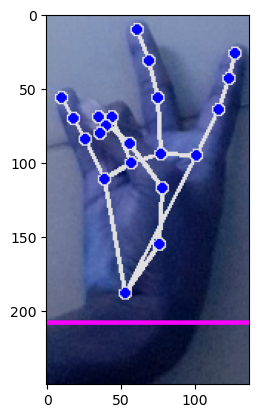

In [58]:
detector = HandDetector(detectionCon=0.8, maxHands=2)
img = cv2.imread("/kaggle/working/ImagePro2/7/2023-09-02_11-52-52.jpg")
hands, img_ = detector.findHands(img.copy())  # with draw
plt.imshow(img_)
img_f = cv2.flip(img_, 1)


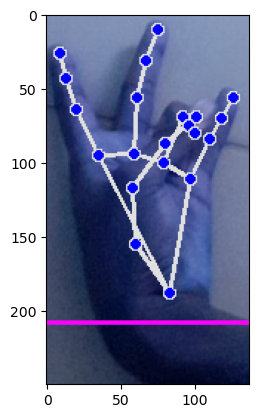

In [61]:
plt.imshow(img_f)

## Preparing Data

In [ ]:
files=os.listdir(path)
# list of files in path
# sort path from A-Y
files.sort ()

# print to see list
print(files)


In [ ]:

# create list of image and label
image_array = []
label_array = []

# Loop through each file in files
for i in range(len(files)):
    # List of images in each folder
    sub_files = os.listdir(path + "/" + files[i])
    
    # Let's check the length of each folder
    #print(len(sub_files))
    
    # Loop through each sub folder
    for j in range(len(sub_files)):
        # Path of each image
        # Example: imagepro/A/image_name.jpg
        file_path = path + "/" + files[i] + "/" + sub_files[j]
        
        # Read each image
        image = cv2.imread(file_path)
        
        # Resize image to 96x96
        image = cv2.resize(image, (96, 96))
        
        # Convert BGR image to RGB image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image_array.append(image)
        label_array.append(i)


In [ ]:
# convert list to array
image_array = np.array(image_array)
label_array = np.array(label_array, dtype="float")

# split the dataset into test and train
#from sklearn.model_selection inport train_test_split

In [66]:
##---New Data loading method
#main_dir = "/kaggle/working/ImagePro"
main_dir = "/kaggle/input/myimagepro/myImagePro"
uniq_labels = sorted(os.listdir(main_dir))
#print(uniq_labels)
lab_dic={}
for v,k in enumerate(uniq_labels):
    lab_dic[k.lower()] = v
#lab_dic["0"] = 40
print(lab_dic)

def file_gen(directory):
    images = []
    labels = []
    #directory = train_dir2
    train_files = sorted(os.listdir(directory))
    #print(train_files)
    for label in train_files:
        for idx, image_nm in enumerate(os.listdir(directory + "/" + label)):
            if idx in range(200):
               filepath = directory + "/" + label + "/" + image_nm
               #print(image_nm)
               #print(idx)
               try: 
                    img = cv2.resize(cv2.imread(filepath), (96,96))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
               except: 
                    continue               
               images.append(img)
               images.append(cv2.flip(img, 1))
               #plt.imshow(image)
               tag = lab_dic[label.lower()]
               labels.append(tag)
               labels.append(tag)
               #print(tag)
        
    return images, labels 

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [67]:
detector = HandDetector(detectionCon=0.8, maxHands=2)
'''
##---New Data loading method
#main_dir = "/kaggle/working/ImagePro"
main_dir = "/kaggle/input/sign-language-dataset/ImagePro"
uniq_labels = sorted(os.listdir(main_dir))
#print(uniq_labels)
lab_dic={}
for v,k in enumerate(uniq_labels):
    lab_dic[k.lower()] = v
lab_dic["0"] = 40
print(lab_dic)

'''
def file_gen_(directory):
    images = []
    labels = []
    #directory = train_dir2
    train_files = sorted(os.listdir(directory))
    #print(train_files)
    for label in train_files:
        if label == "Blank":
            continue
        if label == "10":
            continue
        for idx, image_nm in enumerate(os.listdir(directory + "/" + label)):            
            if idx in range(10):
               filepath = directory + "/" + label + "/" + image_nm
               #print(image_nm)
               #print(idx)
               try: 
                    img = cv2.imread(filepath)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    hands, img_ = detector.findHands(img.copy())  # with draw
               except: 
                    continue
               if hands:
                    print("image detected")
                    hand = hands[0]
                    x1, y1 = hand["bbox"][0], hand["bbox"][1]
                    x2, y2 = x1 + hand["bbox"][2], y1 + hand["bbox"][3]
                    padding = 50  # adjust this value to increase/decrease padding
                    x1 -= padding
                    y1 -= padding
                    x2 += padding
                    y2 += padding
                    cropped_img = img[max(0, y1):min(y2, img.shape[0]), max(0, x1):min(x2, img.shape[1])]    
                    cropped_img = cv2.resize(cropped_img, (64,64))
                    #cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
                    tag = lab_dic[label.lower()]
                    images.append(cropped_img)
                    images.append(cv2.flip(cropped_img, 1))
                    #plt.imshow(image)
                    labels.append(tag)
                    labels.append(tag)
                    #print(tag)
               else:
                    print("no image detected")
    return images, labels 

In [68]:
#create a data list
data_list = []
label_list = []


#read from dir1
#train_dir1 = "/kaggle/working/ImagePro"
train_dir2 = "/kaggle/input/myimagepro/myImagePro"
#images_1, labels_1 = file_gen(train_dir1)
images_2, labels_2 = file_gen(train_dir2)
#images_4, labels_4 = file_gen(train_dir4)

#data_list.extend(images_1)
#label_list.extend(labels_1)
data_list.extend(images_2)
label_list.extend(labels_2)
#data_list.extend(images_4)
#label_list.extend(labels_4)

#del(images_1)
#del(labels_1)
del(images_2)
del(labels_2)
#del(images_4)
#del(labels_4)

image_array = np.asarray(data_list)
label_array = np.asarray(label_list)

In [ ]:
##____for test


data_list_test = []
label_list_test = []


#read from dir1
test_dir1 = "/kaggle/input/synthetic-asl-numbers/Train_Nums"
#images_test, labels_test = file_gen(test_dir1)
images_test, labels_test = file_gen_(test_dir1)

data_list_test.extend(images_test)
label_list_test.extend(labels_test)

del(images_test)
del(labels_test)

image_array_test = np.asarray(data_list_test)
label_array_test = np.asarray(label_list_test)

y_cat_test = keras.utils.to_categorical(label_array_test)


In [21]:
len(image_array_test)

NameError: name 'image_array_test' is not defined

In [24]:
image_array.shape

(945, 96, 96, 3)

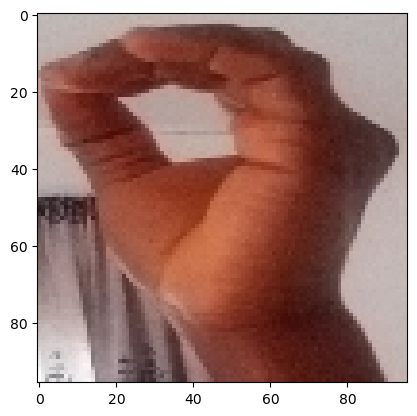

In [26]:
plt.imshow(image_array[80])

## Splitting Data

In [27]:
# output spliting size
X_train, X_test, y_train, y_test = train_test_split(image_array, label_array, test_size=0.15)

# X_train will have 85% of images
# X_test will have 15% of inages

In [ ]:
len(X_train)

In [ ]:
del image_array
del label_array

**converting to categorical for vgg16**

In [28]:
import keras

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)
#y_eval_cat = keras.utils.to_categorical(y_eval)

In [29]:
y_train_cat.shape

(803, 10)

## Building Models

**Fist model (EfficientNetDB)**

In [ ]:
from keras import layers, callbacks, utils, applications, optimizers
from keras.models import Sequential, Model, load_model

model = Sequential()

# Add pretrained models to Sequential model
# I will use EfficientNetB0 pretrained model. You can try a different model.
pretrained_model = tf.keras.applications.EfficientNetB0(input_shape=(96,96,3), include_top=False)

#don't train existing weights for vgg16
#for layer in classifier_vgg16.layers:
    #layer.trainable = False

model.add(pretrained_model)

# Add pooling to the model
model.add(layers.GlobalAveragePooling2D())

# Add dropout to the model
# We add dropout to increase accuracy by reducing overfitting
model.add(layers.Dropout(0.3))

# Finally, add a dense layer as the output
model.add(layers.Dense(1))

# Print the model summary
model.summary()
model.compile(optimizer="adam", loss="mae", metrics=["mae"])


In [ ]:

# Create a checkpoint to save the best model
checkpoint_path = "trained_model/model"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_mae",
    mode="auto",
    save_best_only=True,
    save_weights_only=True
)

# Learning rate reducer
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    patience=5,
    factor=0.9,
    monitor="val_mae",
    mode="auto",
    cooldown=0,
    verbose=1,
    min_lr=1e-6
)



CNN MODEL

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model3
model3 = tf.keras.Sequential()

# Convolutional layers
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model3.add(Flatten())

# Dense (fully connected) layers
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))  # Dropout for regularization

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model3.add(Dense(10, activation='softmax'))  # 10 output classes

# Compile the model3
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model3 summary
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

**Model 2 (VGG16)**

In [ ]:
#Initialising vgg16 
classifier_vgg16 = VGG16(input_shape= (96,96,3),include_top=False,weights='imagenet')

#don't train existing weights for vgg16
for layer in classifier_vgg16.layers:
    layer.trainable = False

classifier1 = classifier_vgg16.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(units=10, activation='softmax')(classifier1)

model2 = Model(inputs = classifier_vgg16.input , outputs = classifier1)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

In [ ]:
y_test_cat.shape

In [ ]:
# start training model
epochs = 50
batch_size = 32
# select batch size according to your graphic card
# X_train, X_test, Y_train, Y_test
#history = model2.fit(
history = model.fit(
    X_train,
    y_train,
    #validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[model_checkpoint, reduce_lr]
)
# before training you can delete image_array and label_array to increase ram memory



In [ ]:
# start training model
epochs = 50
batch_size = 32
# select batch size according to your graphic card
# X_train, X_test, Y_train, Y_test
history = model2.fit(
    X_train,
    y_train_cat,
    #validation_data=(X_test, y_test_cat),
    batch_size=batch_size,
    epochs=epochs,
    #callbacks=[model_checkpoint, reduce_lr]
)
# before training you can delete image_array and label_array to increase ram memory



In [32]:
# start training model
epochs = 20
batch_size = 32
# select batch size according to your graphic card
# X_train, X_test, Y_train, Y_test
history = model3.fit(
    X_train,
    y_train_cat,
    validation_data=(X_test, y_test_cat),
    batch_size=batch_size,
    epochs=epochs,
    #callbacks=[model_checkpoint, reduce_lr]
)
# before training you can delete image_array and label_array to increase ram memory



Epoch 1/20
26/26 [==============================] - 8s 306ms/step - loss: 0.5807 - accuracy: 0.8157 - val_loss: 0.2762 - val_accuracy: 0.9155
Epoch 2/20
26/26 [==============================] - 8s 296ms/step - loss: 0.3693 - accuracy: 0.8904 - val_loss: 0.3192 - val_accuracy: 0.8732
Epoch 3/20
26/26 [==============================] - 8s 294ms/step - loss: 0.3769 - accuracy: 0.8867 - val_loss: 0.1746 - val_accuracy: 0.9507
Epoch 4/20
26/26 [==============================] - 8s 309ms/step - loss: 0.3610 - accuracy: 0.8867 - val_loss: 0.1457 - val_accuracy: 0.9577
Epoch 5/20
26/26 [==============================] - 8s 293ms/step - loss: 0.3383 - accuracy: 0.8941 - val_loss: 0.1049 - val_accuracy: 0.9718
Epoch 6/20
26/26 [==============================] - 8s 290ms/step - loss: 0.2359 - accuracy: 0.9215 - val_loss: 0.1136 - val_accuracy: 0.9718
Epoch 7/20
26/26 [==============================] - 8s 295ms/step - loss: 0.1999 - accuracy: 0.9402 - val_loss: 0.1191 - val_accuracy: 0.9718
Epoch 

In [ ]:
print(X_train.shape)
print(y_train_cat.shape)

## Evaluating models

Evaluation on normal test data

In [33]:
#score = model.evaluate(x = X_test, y = y_test, verbose = 0)
#print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model3.evaluate(x = X_test, y = y_test_cat, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for evaluation images: 97.183 %


Evaluation on a differrent test data

In [ ]:
#score = model.evaluate(x = image_array_test, y = y_cat_test, verbose = 0)
#print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model2.evaluate(x = image_array_test, y = y_cat_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

In [ ]:
predictions = model.predict(X_test, batch_size=2)
print(predictions[:10])
print(y_test[:10])

In [ ]:
predictions = model2.predict(X_test, batch_size=2)
print(predictions[:10])
print(y_test[:10])

In [ ]:
lab_dic

## Testing models

1/1 [==============================] - 0s 30ms/step
5


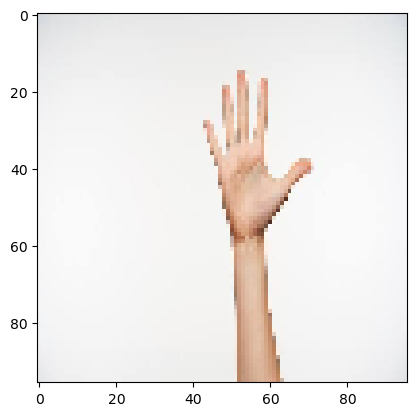

In [46]:
image_array= []

# Read each image
image = cv2.imread("/kaggle/input/hands-few/images.jpeg-2.jpg")
        
# Resize image to 96x96
image = cv2.resize(image, (96, 96))
        
# Convert BGR image to RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
image_array.append(image)
#label_array.append(i)

# convert list to array
image_array = np.array(image_array)

predictions = model3.predict(image_array, batch_size=2)
pred = np.argmax(predictions)
print(pred)
plt.imshow(image)

In [ ]:
im = X_test[90]
predictions = model2.predict(np.array([im]), batch_size=2)
pred = np.argmax(predictions)
print(pred)
plt.imshow(im)

No image detected
1/1 [==============================] - 0s 25ms/step
3


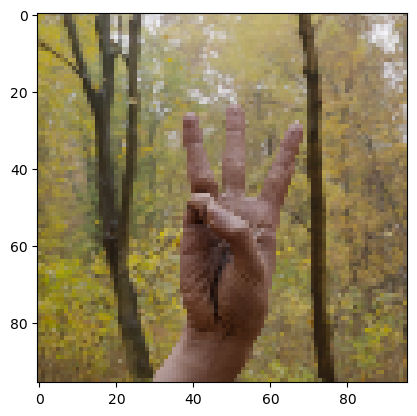

In [56]:
detector = HandDetector(detectionCon=0.8, maxHands=2)
image = cv2.imread("/kaggle/input/synthetic-asl-numbers/Test_Nums/6/0ec0f3a8-67d5-48e3-ab74-5444abd9488d.rgb_0000.png")
hands, img = detector.findHands(image.copy())  # with draw

if hands:
    print("image detected")
    hand = hands[0]
    x1, y1 = hand["bbox"][0], hand["bbox"][1]
    x2, y2 = x1 + hand["bbox"][2], y1 + hand["bbox"][3]
    padding = 50  # adjust this value to increase/decrease padding
    x1 -= padding
    y1 -= padding
    x2 += padding
    y2 += padding
    cropped_img = image[max(0, y1):min(y2, img.shape[0]), max(0, x1):min(x2, img.shape[1])]    
    #cv2_imshow(cropped_img)
else:
    print("No image detected")
    cropped_img = image

image_array= []

# Read each image
#image = cv2.imread("/kaggle/input/mydata-alpha-2long/20230830_125715.jpg")

image = cropped_img
# Resize image to 96x96
image = cv2.resize(image, (96, 96))
        
# Convert BGR image to RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
image_array.append(image)
#label_array.append(i)

# convert list to array
image_array = np.array(image_array)
predictions = model3.predict(image_array, batch_size=2)
pred = np.argmax(predictions)
print(pred)
plt.imshow(image)
#plt.imshow(cropped_img)